In [1]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10,6)

In [5]:
df = pd.read_csv("heights (1).csv")
df.sample(5)

,gender,height
6841,Female,61.012234
7207,Female,63.768212
8108,Female,61.963051
6468,Female,66.195571
3588,Male,72.854213


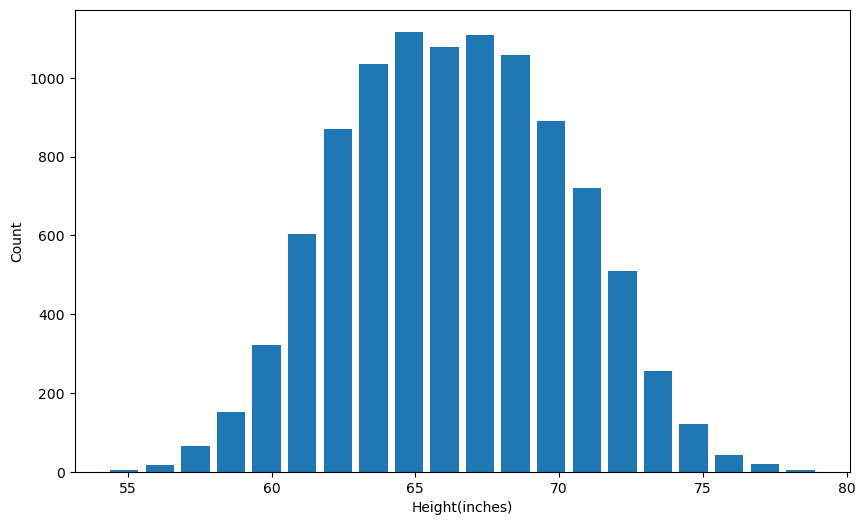

In [9]:
plt.hist(df.height,bins = 20, rwidth=0.8)
plt.xlabel("Height(inches)")
plt.ylabel("Count")
plt.show()

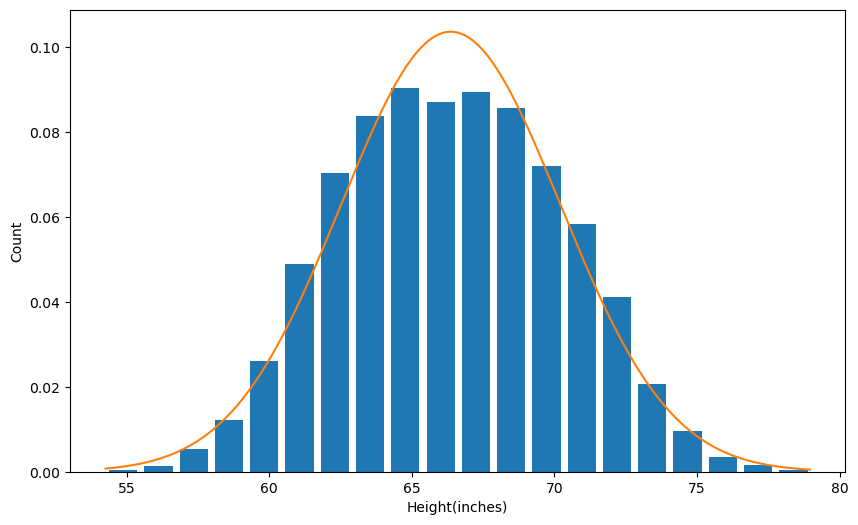

In [17]:
from scipy.stats import norm
import numpy as np
plt.hist(df.height, bins = 20 , rwidth=0.8, density=True)
plt.xlabel("Height(inches)")
plt.ylabel("Count")
# plt.show()

rng = np.arange(df.height.min(), df.height.max(), 0.1)
plt.plot(rng, norm.pdf(rng,df.height.mean(),df.height.std()))

In [21]:

df.height.min()

54.26313333

In [23]:
df.height.max()

78.99874235

In [25]:
df.height.mean()

66.367559754866

In [27]:
df.height.std() # std dev is showing how far away is the data is from the mean value

3.847528120795573

Here the mean is 66.37 and standard deviation is 3.84.

# (1) Outlier detection and removal using 3 standard deviation

One of the ways we can remove outliers is remove any data points that are beyond 3 standard deviation from mean. Which means we can come up with following upper and lower bounds

In [34]:
upper_limit = df.height.mean() + 3* df.height.std()
upper_limit

77.91014411725271

In [36]:
lower_limit = df.height.mean() -3*df.height.std()
lower_limit

54.824975392479274

Here are the outliers that are beyond 3 std dev from mean

In [39]:
df[(df.height>upper_limit) | (df.height<lower_limit)]

,gender,height
994,Male,78.095867
1317,Male,78.462053
2014,Male,78.998742
3285,Male,78.528210
3757,Male,78.621374
6624,Female,54.616858
9285,Female,54.263133


Above the heights on higher end is 78 inch which is around 6 ft 6 inch. Now that is quite unusual height. There are people who have this height but it is very uncommon and it is ok if you remove those data points. Similarly on lower end it is 54 inch which is around 4 ft 6 inch. While this is also a legitimate height you don't find many people having this height so it is safe to consider both of these cases as outliers

# Now remove these outliers and generate new dataframe

In [43]:
df_no_outlier_std_dev = df[(df.height<upper_limit) & (df.height>lower_limit)]
df_no_outlier_std_dev.head()

,gender,height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796


In [45]:
df_no_outlier_std_dev.shape

(9993, 2)

In [47]:
df.shape

(10000, 2)

Above shows original dataframe data 10000 data points. Out of that we removed 7 outliers (i.e. 10000-9993)

# (2) Outlier detection and removal using Z Score

In [51]:
df['zscore'] = ( df.height - df.height.mean() ) / df.height.std()
df.head(5)

,gender,height,zscore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375


Above for first record with height 73.84, z score is 1.94. This means 73.84 is 1.94 standard deviation away from mean

In [56]:
(73.84-66.37)/3.84
# height - mean / std

1.9453124999999998

Get data points that has z score higher than 3 or lower than -3. Another way of saying same thing is get data points that are more than 3 standard deviation away

In [59]:
df[df['zscore']<-3]

,gender,height,zscore
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027


In [61]:
df[df['zscore']>3]

,gender,height,zscore
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854
